In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_test = pd.read_csv('test.csv')
df = pd.read_csv('train.csv')

df.fillna(method='ffill', inplace=True)

In [57]:
df['price_range'].value_counts()

1    390
0    376
2    375
3    359
Name: price_range, dtype: int64

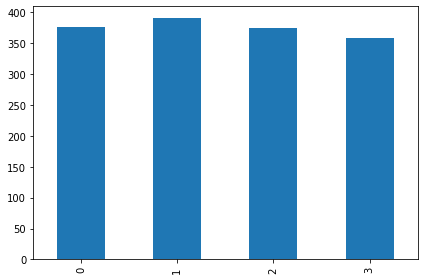

In [58]:
df['price_range'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

In [3]:
fourg = {
    'Tidak': 0,
    'Ya': 1
}

price = {
    '0-<1000k': 0,
    '1000k-<2000k': 1,
    '2000k-3000k': 2,
    '>3000k': 3
}

In [4]:
df['four_g'] = df['four_g'].replace(fourg)
df['price_range'] = df['price_range'].replace(price)

df_test['four_g'] = df['four_g'].replace(fourg)

In [5]:
X = df.drop([ 'price_range'], axis=1)
y = df['price_range']

# data uji
X_new = df_test

In [55]:
print('Data X hasil drop')
display(X.head())
print('Data price range dari data x')
display(y.head())
print('Data yang akan diprediksi')
display(X_new.head())

Data X hasil drop


,index,daya_baterai,bluetooth,kecepatan_clock,dual_sim,kamera_depan,four_g,memori_internal,tebal_hp,berat_hp,...,kamera_belakang_mp,px_panjang,px_lebar,kapasitas_ram,panjang_layar,lebar_layar,waktu_telfon,three_g,touch_screen,wifi
0,1045,531,0,1.1,0,10,0,63,0.7,189,...,14,145,1903,2958,17.0,1,19,0,1,0
1,937,764,1,1.2,1,1,0,13,1.0,152,...,2,361,511,3148,18.0,7,6,1,1,0
2,1658,1812,1,1.3,1,4,1,42,1.0,162,...,15,380,1550,3338,18.0,13,11,1,1,1
3,529,1821,0,0.9,0,9,1,12,0.3,114,...,18,97,1803,2430,7.0,4,6,1,1,1
4,895,1790,1,2.3,1,3,1,49,0.5,100,...,11,396,1980,3568,6.0,2,18,1,0,1


Data price range dari data x


0    2
1    2
2    3
3    2
4    3
Name: price_range, dtype: int64

Data yang akan diprediksi


,index,daya_baterai,bluetooth,kecepatan_clock,dual_sim,kamera_depan,four_g,memori_internal,tebal_hp,berat_hp,...,kamera_belakang_mp,px_panjang,px_lebar,kapasitas_ram,panjang_layar,lebar_layar,waktu_telfon,three_g,touch_screen,wifi
0,405,1454,1,0.5,1,1,0,34,0.7,83,...,3,250,1033,3419,7,5,5,1,1,0
1,1190,1092,1,0.5,1,10,0,11,0.5,167,...,14,468,571,737,14,4,11,0,1,0
2,1132,1524,1,1.8,1,0,1,10,0.6,174,...,1,154,550,2678,16,5,13,1,0,1
3,731,1807,1,2.1,0,2,1,49,0.8,125,...,10,337,1384,1906,17,13,13,0,1,1
4,1754,1086,1,1.7,1,0,1,43,0.2,111,...,1,56,1150,3285,11,5,17,1,1,0


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
modell = KNeighborsClassifier()

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [29]:
param_grid = {'n_neighbors': np.arange(6,20),'weights':['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
gscv = GridSearchCV(modell, param_grid, cv=5, scoring='accuracy')

In [30]:
gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [31]:
gscv.best_params_

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}

In [32]:
gscv.best_score_

0.9111111111111111

In [34]:
model_knn = KNeighborsClassifier(n_neighbors= 10, weights = 'uniform', algorithm = 'auto')
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [37]:
y_pred = model_knn.predict(X_new)

In [44]:
colnames = ['price_range']
dfprice = pd.DataFrame(y_pred, columns=colnames)

dfprice.head()

,price_range
0,3
1,0
2,2
3,2
4,2


In [46]:
df_hasil = pd.merge(df_test, dfprice, left_index=True, right_index=True)
df_hasil.head()

,index,daya_baterai,bluetooth,kecepatan_clock,dual_sim,kamera_depan,four_g,memori_internal,tebal_hp,berat_hp,...,px_panjang,px_lebar,kapasitas_ram,panjang_layar,lebar_layar,waktu_telfon,three_g,touch_screen,wifi,price_range
0,405,1454,1,0.5,1,1,0,34,0.7,83,...,250,1033,3419,7,5,5,1,1,0,3
1,1190,1092,1,0.5,1,10,0,11,0.5,167,...,468,571,737,14,4,11,0,1,0,0
2,1132,1524,1,1.8,1,0,1,10,0.6,174,...,154,550,2678,16,5,13,1,0,1,2
3,731,1807,1,2.1,0,2,1,49,0.8,125,...,337,1384,1906,17,13,13,0,1,1,2
4,1754,1086,1,1.7,1,0,1,43,0.2,111,...,56,1150,3285,11,5,17,1,1,0,2


In [47]:
new_fourg = {
    0: 'Tidak',
    1: 'Ya'
}

In [48]:
x_index = df_hasil.drop(['index', 'price_range'], axis=1)
y_index = df_hasil['index']
y_price = df_hasil['price_range']

In [49]:
df_pengamatan = pd.merge(y_index, y_price, left_index=True, right_index=True)
df_pengamatan.head()

,index,price_range
0,405,3
1,1190,0
2,1132,2
3,731,2
4,1754,2


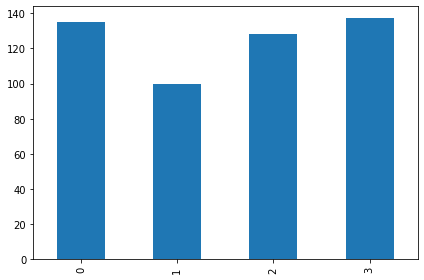

In [59]:
df_pengamatan['price_range'].value_counts().plot.bar()
plt.tight_layout()
plt.show()